Parte 1 - Leitura do dataset e configurações iniciais

Importa as classes necessárias para acessar o arquivo de dados.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Lê o arquivo com os dados e apresenta o dataframe

In [3]:
colunas = ['preco', 'manutencao', 'portas', 'pessoas', 'bagageiro', 'seguranca', 'resultado']
dados = pd.read_csv('car_evaluation.csv', names=colunas)
dados

,preco,manutencao,portas,pessoas,bagageiro,seguranca,resultado
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Atributos e valores:

preco - Preço de venda:
low - baixo;
med - médio;
high - alto;
vhigh - muito alto.
manutencao - Custo de manutenção:
low - baixo;
med - médio;
high - alto;
vhigh - muito alto.
portas - Quantidade de portas:
2 - duas;
3 - três;
4 - quatro;
5more - cinco ou mais.
pessoas - Quantidade de pessoas:
2 - duas;
4 - quatro;
more - mais.
bagageiro - Tamanho do bagageiro:
small - pequeno;
med - médio;
big - grande;
segurança - Nível de segurança:
low - baixo;
med - médio;
high - alto.
resultado' - Resultado sobre a análise do carro:
unacc - inaceitável;
acc - aceitável;
good - bom;
vgood - muito bom.

Transforma os valores qualitativos em codificações numéricas.

In [4]:
from sklearn.preprocessing import LabelEncoder

dados2 = dados.copy()
le = LabelEncoder()
dados2['preco']=le.fit_transform(dados['preco'])
dados2['manutencao']=le.fit_transform(dados['manutencao'])
dados2['portas']=le.fit_transform(dados['portas'])
dados2['pessoas']=le.fit_transform(dados['pessoas'])
dados2['bagageiro']=le.fit_transform(dados['bagageiro'])
dados2['seguranca']=le.fit_transform(dados['seguranca'])
dados2['resultado']=le.fit_transform(dados['resultado'])
dados2.head(10)

,preco,manutencao,portas,pessoas,bagageiro,seguranca,resultado
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2



Cria a matriz X com todos atributos, exceto o resultado;
Cria o vetor y com o atributo resultado;
Divide os dados em 33% para teste e 67% para treinamento.

In [5]:
from sklearn.model_selection import train_test_split

X = dados2.drop(["resultado"] ,axis="columns")
y = dados2['resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13, shuffle=True)

Parte 2 - Exemplo - kNN

Relatório do conjunto de treinamento: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00       807
           3       1.00      1.00      1.00        44

    accuracy                           1.00      1157
   macro avg       1.00      1.00      1.00      1157
weighted avg       1.00      1.00      1.00      1157

Relatório do conjunto de teste: 
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       126
           1       0.39      0.43      0.41        21
           2       0.88      0.88      0.88       403
           3       0.48      0.52      0.50        21

    accuracy                           0.79       571
   macro avg       0.59      0.61      0.60       571
weighted avg       0.79      0.79      0.79       571



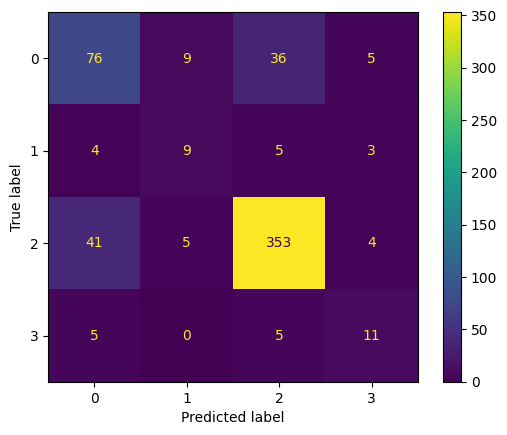

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

modelo = KNeighborsClassifier(n_neighbors=1)
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
print("Relatório do conjunto de treinamento: ")
relatorio_train = classification_report(y_train, y_pred_train)
print(relatorio_train)

y_pred = modelo.predict(X_test)
print("Relatório do conjunto de teste: ")
relatorio_teste = classification_report(y_test, y_pred)
print(relatorio_teste)

matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()

Parte 3 - Atividade

Outros atributos podem ser definidos na construção do modelo kNN, além de n_neighbors, que recebe um número inteiro positivo que indica quantos vizinhos devem ser considerados na definição da classe. Dentre eles destacam-se:

weights: indica como se define o peso de cada vizinho mais próximo na definição do resultado. Os valores possíveis são uniform e distance, sendo o primeiro o valor default.
p: potência aplicada no cálculo da distância de Minkowski, um número em ponto flutuante sendo 2 o valor default (distância euclidiana).
algorithm: algoritmo utilizado para encontrar os pontos mais próximos. Os valores possíveis são auto, ball_tree, kd_tree, brute, sendo auto o valor default.
Elabore um código que teste automaticamente os diferentes valores dos parâmetros listadas abaixo e apresente a acurácia para o conjunto de teste de cada uma delas.

n_neighbors: 1 a 20 mantendo os demais parâmetros com os valores padrão.

p: 1 a 5. Teste com o valor de n_neighbor que gerou o melhor resultado no experimento anterior.

weights: altere o valor para distance. Teste com os valores de n_neighbor e p que geraram os melhores resultados no experimento anterior.

algorithm: teste com os quatro valores possíveis para este parâmetro. Teste com os valores de n_neighbor, p e weights que geraram os melhores resultados no experimento anterior.